/tmp/ipykernel_5121/2501863749.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['PersonBirthDate', 'CINreferralDate', 'CINclosureDate']] = df[['PersonBirthDate', 'CINreferralDate', 'CINclosureDate']].apply(
/tmp/ipykernel_5121/2501863749.py:48: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


5262.0


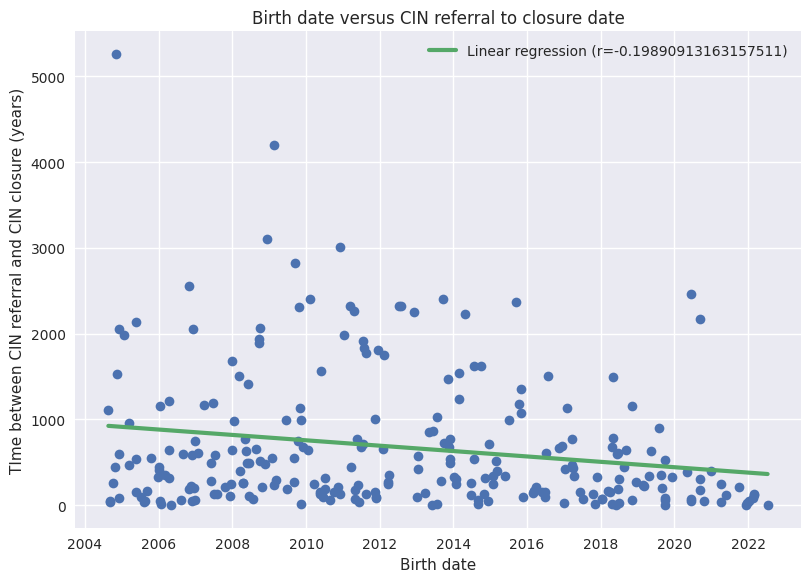

In [9]:
'''Day to day workshop explaining how to merge tables, plot a
scatter, add a line of fit, and do a linear regression.'''

import pandas as pd
import datetime
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import matplotlib.dates as mdates


# Getting data in from CSVs to dataframes
ChildIdentifiers = pd.read_csv('/workspaces/LA-Analyst-Tinkering/FAKE-CIN-DATA/FakeChildIdentifiers.csv')
CINdetails = pd.read_csv('/workspaces/LA-Analyst-Tinkering/FAKE-CIN-DATA/FakeCINdetails.csv')

#print(CINdetails)
#print(ChildIdentifiers)

# Merging the dataframes on LAchildID so we can use data in both tables.
merged_df = CINdetails.merge(ChildIdentifiers, left_on='LAchildID', right_on='LAchildID', how='left')
#print(merged_df)

# Simplifying workflow by reducing rows we are working with,
df = merged_df[['LAchildID', 'PersonBirthDate', 'CINreferralDate', 'CINclosureDate']]

# Converting date rows to datetime for date related comparisons and calculations.
df[['PersonBirthDate', 'CINreferralDate', 'CINclosureDate']] = df[['PersonBirthDate', 'CINreferralDate', 'CINclosureDate']].apply(
    pd.to_datetime, format='%Y/%m/%d', errors='coerce'
)

# Dropping rows with no closure date.
df = df[df['CINclosureDate'].notna()]

# Finding out how long children wait between CIn referrals and closing their CIN plans.
df['CINrefToClose'] = (df['CINclosureDate'] - df['CINreferralDate'])
df['CINrefToClose'] = df['CINrefToClose'].astype('timedelta64[h]')
df['CINrefToClose'] = df['CINrefToClose'].astype(float) / 24
print(df['CINrefToClose'].max())

# Converting dates to numbers because scipy regression analysis doesn't like dates.

y = df['CINrefToClose']
x = mdates.date2num(df['PersonBirthDate'])

# Plotting out basic graph of birth dates versus wait time.
# Use seaborn style, person birth datec
plt.style.use('seaborn')
plt.plot(df['PersonBirthDate'], y, 'o')


# Regression analysis using scipy.
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
yf = (slope*xf)+intercept

# Plotting the regression line on the same plot
plt.plot(xf1, yf, lw=3, label=f'Linear regression (r={r_value})')


# Alternate way of doing the regression analysis and plotting
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m * x + b, label=f'Linear Regression \n r ={m}')

# Formatting the
plt.tight_layout()
plt.title('Birth date versus CIN referral to closure date')
plt.xlabel('Birth date')
plt.ylabel('TIme between CIN referral and CIN closure (years)')
plt.legend()
plt.show()



An r value of around -0.2 indicates a small negative association between birth date and time between CIN referral and CIN plan closure.